In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#defining column names since data doent have them
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

#defining dataframe
df = pd.read_csv(r'Data\\auto-mpg.csv', na_values="?", comment='\t', sep=' '
                    , skipinitialspace=True, names=cols)

In [2]:
#defining dependent variable dataframe which the model has to predict
actual_y = df['mpg']
df.shape

(398, 8)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
#checking for null values
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [6]:
#replacing null values with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is:  0.45706634399491913


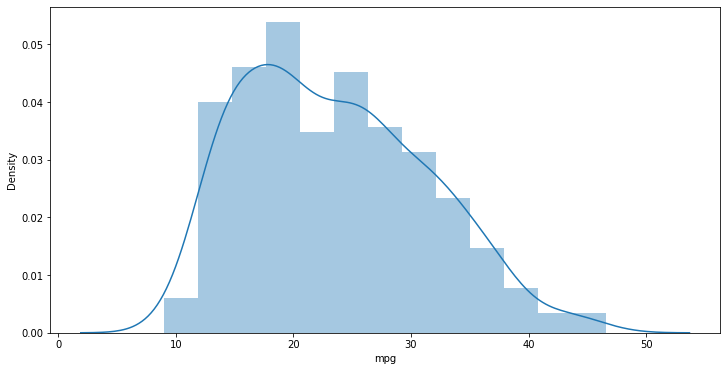

In [7]:
#checking for skewness
f, ax = plt.subplots(figsize = (12, 6))
sns.distplot(actual_y)
print("Skew is: ", actual_y.skew())

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is:  -0.13649360900999818


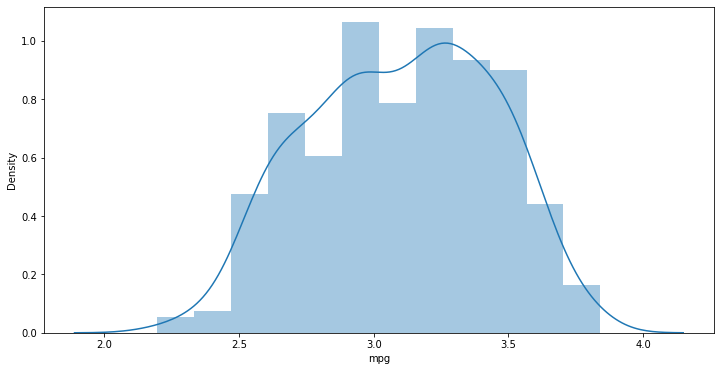

In [8]:
#taking log to deal with skewness
log_actual_y = np.log(actual_y)
f, ax = plt.subplots(figsize = (12, 6))
sns.distplot(log_actual_y)
print("Skew is: ", log_actual_y.skew())

In [9]:
#checking for correlation between varaiables
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [10]:
#checking for correlation with respect to dependent varaible
corr['mpg'].sort_values(ascending=False)

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

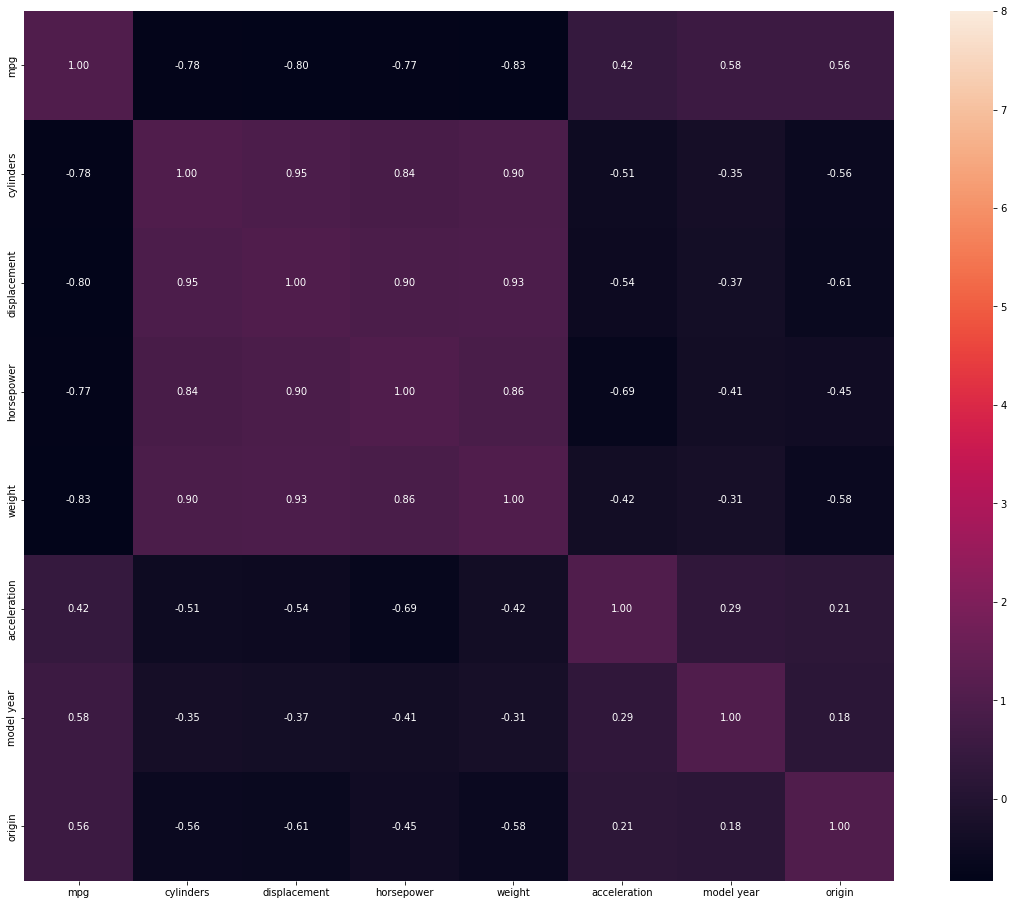

In [11]:
#making heatmap of data
corr_map = corr
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_map, vmax=8, square=True, annot=True, fmt='.2f')
plt.show()

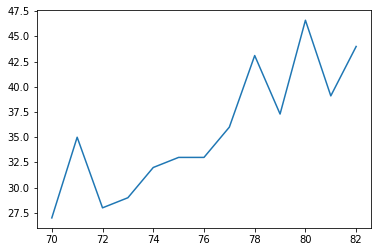

In [12]:
#checking relation between model year and mpg
data = df[['model year', 'mpg']]
data = data.groupby('model year').max()
data = data.reset_index()
data

plt.plot(data['model year'], data['mpg'], linestyle ='solid')

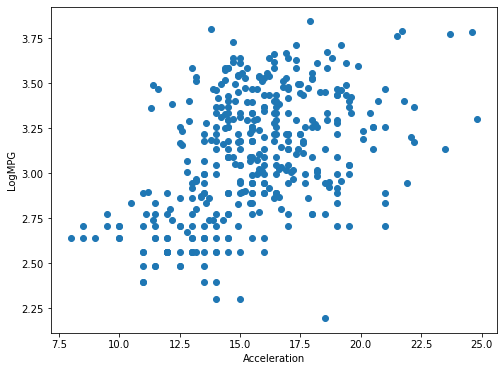

In [13]:
#using scatter plot between log of mpg and accelaration to check for outliers
plt.figure(figsize=(8, 6))
plt.scatter(x = df['acceleration'], y= log_actual_y)
plt.ylabel('LogMPG')
plt.xlabel('Acceleration')
plt.show()

In [14]:
#dropping outliers
df = df[df['acceleration'] < 22.5]

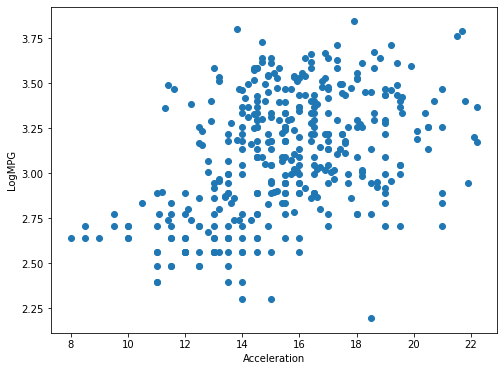

In [15]:
#checking data after dropping outliers
plt.figure(figsize=(8, 6))
plt.scatter(x = df['acceleration'], y= np.log(df.mpg))
plt.ylabel('LogMPG')
plt.xlabel('Acceleration')
plt.show()

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is:  0.06464047932225805


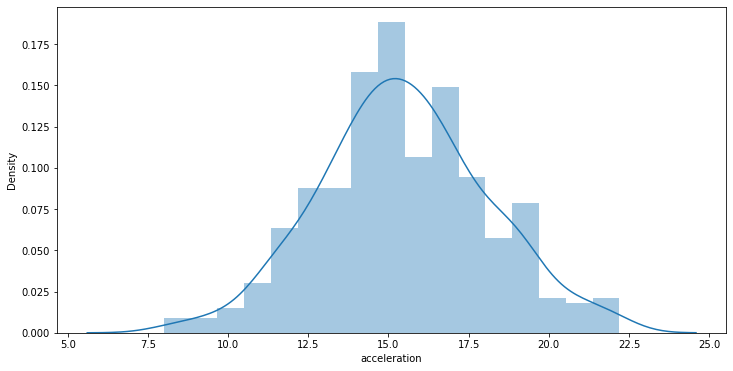

In [16]:
#checking for skewness in accelaration
f, ax = plt.subplots(figsize = (12, 6))
sns.distplot(df['acceleration'])
print("Skew is: ", df['acceleration'].skew())

In [17]:
#dropping columns having high corr between themselves
df = df.drop(['displacement', 'cylinders', 'weight'], axis=1)

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is:  1.1125703025197509


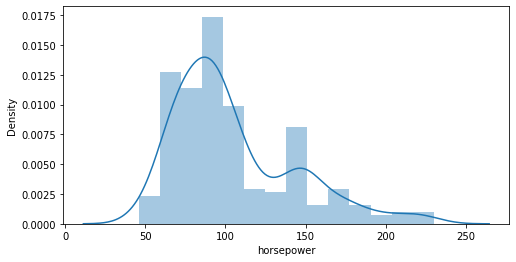

In [18]:
#checking for skewness in horsepower
f, ax = plt.subplots(figsize = (8, 4))
sns.distplot(df['horsepower'])
print("Skew is: ", df['horsepower'].skew())

In [19]:
#converting to log to deal with skewness
df['horsepower'] = np.log(df['horsepower'])

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is:  0.40177873747866455


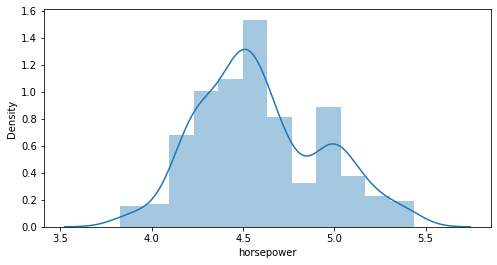

In [20]:
#checking data again
f, ax = plt.subplots(figsize = (8, 4))
sns.distplot(df['horsepower'])
print("Skew is: ", df['horsepower'].skew())

In [21]:
#bringing outliers to nearest quantile value
from scipy.stats.mstats import winsorize
df['horsepower'] = winsorize(df['horsepower'], limits=(0, 0.2), inclusive=(True, True), inplace=False, axis=None)

C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


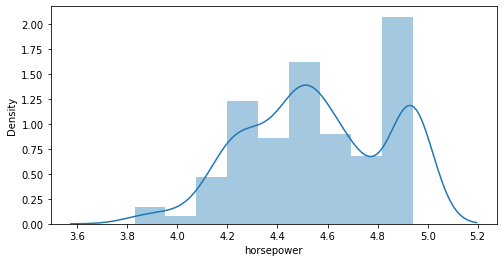

In [22]:
#checking data again
f, ax = plt.subplots(figsize =(8, 4))
sns.distplot(df['horsepower'])
plt.show()

In [23]:
#making varaibles for testing and training
from sklearn.model_selection import train_test_split
y = df['mpg']
x = df.loc[: , df.columns != 'mpg']
print(x.shape)

#initialising testing and training variables
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.3 , random_state=42)

(394, 4)


In [24]:
#initialising linear prediction model
from sklearn import linear_model

linear_model = linear_model.LinearRegression()
lr_model = linear_model.fit(x_train, y_train)
y_pred_lr = linear_model.predict(x_train)           #prediction of training variable
y_pred_test_lr = linear_model.predict(x_test)           #prediction of testing variable

In [25]:
#making a combined dataframe
combined_df = pd.concat([y_train, pd.DataFrame(y_pred_lr)], axis = 1)

In [26]:
#checking mean sq. error on predicted variable
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_pred_lr))

10.200616138539125


C:\Users\aj601\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


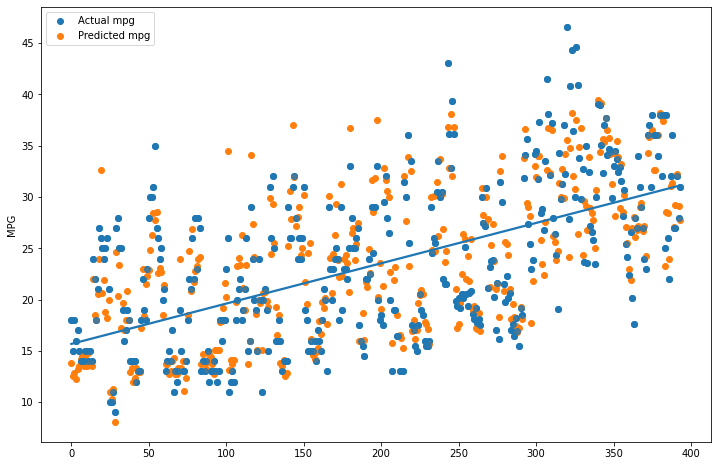

In [27]:
#plotting scatter plot between actual vs predicted data to compare the prediction of the model
newdf = df.drop('mpg',axis=1)

data = pd.DataFrame({'Actual mpg':df.mpg.values,
                    'Predicted mpg':linear_model.predict(newdf.values)})


plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.ylabel('MPG')
plt.legend(loc='upper left')
sns.regplot(x = data.index, y = data['Actual mpg'].values, ci = None,data = data)       #fitting regression line in the scatter plot
plt.show()